In [1]:
import datetime                  # test + Uncertainty
import pandas as pd              # test + Uncertainty
import numpy as np               # test + Uncertainty
import pickle5 as pickle                    # Uncertainty

#import test_model as tm          # test
import test_uncertainty_ReLU as tuc   # Uncertainty
from humanfriendly import format_timespan

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import roc_auc_score
import performance

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc

PyTorch Version:  1.7.1
Torchvision Version:  0.8.2


In [2]:
execute_test = False
start_date=datetime.datetime.now()
print(start_date)
if execute_test:        
    %run test_model --config ../config/config_squeezenet1_0.ini

2021-05-11 23:08:44.596190


## RUN TEST ON PICTURES

In [3]:
pd.set_option('max_colwidth', -1)
# idx=np.argmax(df_result_ensemble.iloc[0]['outputs_mean'])
# df_result_ensemble.iloc[0]['outputs_mean'][idx]

In [4]:
# tm1.df_result
print(f'uncertainty running: {datetime.datetime.now()}')

uncertainty running: 2021-05-11 23:08:44.607286


## RUN UNCERTAINTY CALCULATIONS

In [5]:
#pd.set_option('display.max_rows', 500)
# saving a DataFrame as csv saves lista (e.g. outputs_mean) as string which leads to conversion problems 
# while loading. so, it's better to save as a pickle file and load it back.
# with open('../results/squeezenet1_0_11.05.2021_02.07.07_df_result_ensemble.pkl', 'rb') as fp:
#      df_result_ensemble = pickle.load(fp)

# df_result_ensemble

In [6]:
# tuc1 = tuc.test_uncertainty('../config/config_squeezenet1_0.ini')
# tuc1 = tuc.test_uncertainty('../config/config_alexnet.ini')
# tuc1 = tuc.test_uncertainty('../config/config_resnet18.ini')
tuc1 = tuc.test_uncertainty('../config/config_densenet121.ini')

2021-05-11 23:08:45,988  uncertainty   INFO  initializing uncertainty calculations


date and time = 11.05.2021_23.08.45


In [7]:
index_to_class = pd.read_csv('../data/index_to_class.csv')
# index_to_class

In [8]:
class_to_index = index_to_class.set_index('class')
class_to_index.columns=['idx']
# class_to_index

In [9]:
tuc1.run()
df_final = tuc1.df_uncertainty
df_final_summary = tuc1.df_final_summary

df_results_eval=df_final
#df_results_eval.loc[:0,:]

2021-05-11 23:08:46,011  uncertainty   INFO  Evaluating top-2 related uncertainty
2021-05-11 23:08:54,120  uncertainty   INFO  Accuracy: 97.1504 ... correct_predictions: 13330 ... all_pictures: 13721
2021-05-11 23:08:54,121  uncertainty   INFO  Out of 391 incorrect predictions, 129 of them were having the 2nd best predictions as the ground truth: 32.9923%


In [10]:
end_date = datetime.datetime.now()
t_delta = end_date - start_date

print(f'ALL done: {end_date} .. total calculation time: {format_timespan(t_delta.seconds)}')

ALL done: 2021-05-11 23:08:54.126868 .. total calculation time: 9 seconds


In [11]:
tuc1.df_combine

count_all  count_match  count_unmatch  accuracy  mean_all  \
actual_class                                                              
1             598        589          9              0.9849    0.261762   
10            578        568          10             0.9827    0.333780   
11            593        577          16             0.9730    0.376290   
12            585        577          8              0.9863    0.347436   
13            648        626          22             0.9660    0.344582   
14            627        582          45             0.9282    0.352392   
15            609        572          37             0.9392    0.329322   
16            579        572          7              0.9879    0.271980   
17            582        571          11             0.9811    0.268053   
18            588        575          13             0.9779    0.251137   
19            585        570          15             0.9744    0.416206   
2             600        592          8              0.9867    0.360026   
20            579        568          11             0.9810    0.327226   
21            637        589          48             0.9246    0.478676   
22            605        570          35             0.9421    0.373202   
3             595        588          7              0.9882    0.253887   
4             592        581          11             0.9814    0.350278   
5             591        584          7              0.9882    0.352762   
6             601        590          11             0.9817    0.315834   
7             584        576          8              0.9863    0.254591   
8             591        572          19             0.9679    0.365524   
9             583        568          15             0.9743    0.287485   
x             440        432          8              0.9818    0.289608   
y             151        141          10             0.9338    0.457250   

              entropy_all  u_entropy_all  mean_match  entropy_match  \
actual_class                                                          
1             3.024059     0.659560       0.252235    3.020899        
10            3.061742     0.667779       0.324971    3.053857        
11            2.810809     0.613050       0.363644    2.794291        
12            2.862864     0.624403       0.339800    2.859850        
13            2.778022     0.605899       0.324212    2.765610        
14            2.906209     0.633857       0.309560    2.904691        
15            2.715431     0.592247       0.292496    2.697872        
16            2.918641     0.636568       0.265317    2.915174        
17            2.724956     0.594325       0.257445    2.711389        
18            2.744375     0.598560       0.236843    2.731444        
19            2.808805     0.612612       0.404586    2.803560        
2             3.131176     0.682923       0.353469    3.134243        
20            2.979471     0.649835       0.317018    2.974522        
21            2.842352     0.619929       0.447344    2.827766        
22            2.873425     0.626706       0.341096    2.868225        
3             2.909013     0.634468       0.246707    2.908155        
4             2.861121     0.624023       0.342811    2.855080        
5             2.851269     0.621874       0.346980    2.847140        
6             2.936486     0.640460       0.306039    2.925564        
7             2.796458     0.609919       0.246965    2.788710        
8             2.956494     0.644824       0.350497    2.946823        
9             2.973890     0.648618       0.272692    2.968880        
x             2.907952     0.634237       0.279650    2.901278        
y             3.143120     0.685528       0.428594    3.123964        

              u_entropy_match  mean_unmatch  entropy_unmatch  \
actual_class                                                   
1             0.658871         0.885233      3.230866          
10            0.666059  

In [12]:
df_results_eval.columns

Index(['uncertainty', 'actual_class', 'best_pred', 'best_2nd_pred',
       'best_score', 'best_2nd_score', 'class_idx', 'best_index',
       'best_2nd_index', 'entr', 'u_entr', 'picture', 'model', 'P_jsd',
       'P_info', 'jsd', 'sum_H', 'H_sum', 'Mean', 'std', 'var', 'Certainty'],
      dtype='object')

## Best Score _ ReLU

max_score: 0.6560999751091003 .. min_score: 0.1185000017285347 .. mean_score: 0.42444031815966404


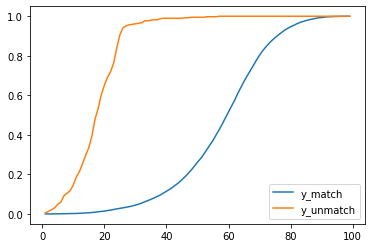

26
0.03353338334583646


In [13]:
max_score = max(df_results_eval['best_score'])
min_score = min(df_results_eval['best_score'])
mean_score = np.mean(df_results_eval['best_score'])

df_results_eval['best_score_Norm']=df_results_eval['best_score'].apply(lambda x: (x-min_score)/(max_score-min_score)*100)

print(f'max_score: {max_score} .. min_score: {min_score} .. mean_score: {mean_score}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['best_score_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['best_score_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

t = 0.95
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(y_match[i])
        break

## Bhattacharyya Coefficient

max_BC: 0.11664450168609619 .. min_BC: 0.013556400313973427 .. mean_BC: 0.05323837210212676


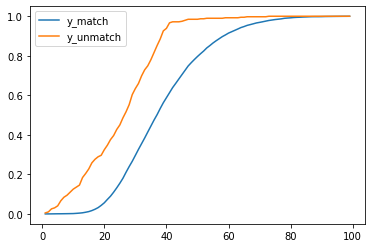

27
0.23930982745686422


In [14]:
"""
Bhattacharyya Coefficient (BC):
The Bhattacharyya coefficient is a measure of the amount of overlap between 
two statistical samples or populations.
"""
df_results_eval['BC']=df_results_eval['best_score']*df_results_eval['best_2nd_score']

max_BC = max(df_results_eval['BC'])
min_BC = min(df_results_eval['BC'])
mean_BC = np.mean(df_results_eval['BC'])

df_results_eval['BC_Norm']=df_results_eval['BC'].apply(lambda x: (x-min_BC)/(max_BC-min_BC)*100)

print(f'max_BC: {max_BC} .. min_BC: {min_BC} .. mean_BC: {mean_BC}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['BC_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['BC_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

t = 0.55
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(y_match[i])
        break

## Certainty (Top-2)

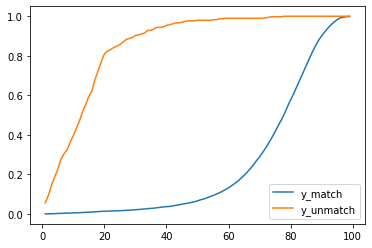

39
0.0374


In [15]:
max_certainty=max(df_results_eval['Certainty'])
min_certainty=min(df_results_eval['Certainty'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: 
                                                (x-min_certainty)/(max_certainty-min_certainty)*100)

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['Certainty_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['Certainty_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.95   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break

In [16]:
tuc1.show_results(result = 'ALL')

Mean for ALL: 0.3341


sum  count      mean      entr    u_entr
actual_class                                               
1             156.5338  598    0.261762  3.024059  0.659560
10            192.9249  578    0.333780  3.061742  0.667779
11            223.1399  593    0.376290  2.810809  0.613050
12            203.2501  585    0.347436  2.862864  0.624403
13            223.2891  648    0.344582  2.778022  0.605899
14            220.9495  627    0.352392  2.906209  0.633857
15            200.5571  609    0.329322  2.715431  0.592247
16            157.4763  579    0.271980  2.918641  0.636568
17            156.0070  582    0.268053  2.724956  0.594325
18            147.6687  588    0.251137  2.744375  0.598560
19            243.4803  585    0.416206  2.808805  0.612612
2             216.0155  600    0.360026  3.131176  0.682923
20            189.4638  579    0.327226  2.979471  0.649835
21            304.9167  637    0.478676  2.842352  0.619929
22            225.7871  605    0.373202  2.873425  0.626706
3             151.0630  595    0.253887  2.909013  0.634468
4             207.3645  592    0.350278  2.861121  0.624023
5             208.4825  591    0.352762  2.851269  0.621874
6             189.8161  601    0.315834  2.936486  0.640460
7             148.6811  584    0.254591  2.796458  0.609919
8             216.0249  591    0.365524  2.956494  0.644824
9             167.6039  583    0.287485  2.973890  0.648618
x             127.4273  440    0.289608  2.907952  0.634237
y             69.0448   151    0.457250  3.143120  0.685528

In [17]:
tuc1.show_results(result = 'match')

Mean for match: 0.3188


sum  count      mean      entr    u_entr
actual_class                                               
1             148.5667  589    0.252235  3.020899  0.658871
10            184.5837  568    0.324971  3.053857  0.666059
11            209.8224  577    0.363644  2.794291  0.609447
12            196.0648  577    0.339800  2.859850  0.623746
13            202.9566  626    0.324212  2.765610  0.603191
14            180.1640  582    0.309560  2.904691  0.633526
15            167.3075  572    0.292496  2.697872  0.588417
16            151.7613  572    0.265317  2.915174  0.635812
17            147.0010  571    0.257445  2.711389  0.591366
18            136.1846  575    0.236843  2.731444  0.595740
19            230.6140  570    0.404586  2.803560  0.611468
2             209.2538  592    0.353469  3.134243  0.683592
20            180.0665  568    0.317018  2.974522  0.648756
21            263.4856  589    0.447344  2.827766  0.616748
22            194.4249  570    0.341096  2.868225  0.625572
3             145.0637  588    0.246707  2.908155  0.634281
4             199.1730  581    0.342811  2.855080  0.622705
5             202.6364  584    0.346980  2.847140  0.620974
6             180.5631  590    0.306039  2.925564  0.638078
7             142.2519  576    0.246965  2.788710  0.608230
8             200.4842  572    0.350497  2.946823  0.642715
9             154.8888  568    0.272692  2.968880  0.647525
x             120.8086  432    0.279650  2.901278  0.632781
y             60.4318   141    0.428594  3.123964  0.681350

In [18]:
tuc1.show_results(result = 'unmatch')

Mean for unmatch: 0.8521


sum  count      mean      entr    u_entr
actual_class                                              
1             7.9671   9      0.885233  3.230866  0.704666
10            8.3412   10     0.834120  3.509578  0.765454
11            13.3175  16     0.832344  3.406509  0.742974
12            7.1853   8      0.898163  3.080233  0.671812
13            20.3325  22     0.924205  3.131205  0.682929
14            40.7855  45     0.906344  2.925836  0.638137
15            33.2496  37     0.898638  2.986889  0.651453
16            5.7150   7      0.816429  3.201966  0.698363
17            9.0060   11     0.818727  3.429175  0.747918
18            11.4841  13     0.883392  3.316324  0.723305
19            12.8663  15     0.857753  3.008124  0.656085
2             6.7617   8      0.845213  2.904187  0.633416
20            9.3973   11     0.854300  3.235037  0.705575
21            41.4311  48     0.863148  3.021343  0.658968
22            31.3622  35     0.896063  2.958106  0.645176
3             5.9993   7      0.857043  2.981136  0.650199
4             8.1915   11     0.744682  3.180202  0.693616
5             5.8461   7      0.835157  3.195693  0.696994
6             9.2530   11     0.841182  3.522355  0.768241
7             6.4292   8      0.803650  3.354277  0.731582
8             15.5407  19     0.817932  3.247641  0.708324
9             12.7151  15     0.847673  3.163614  0.689998
x             6.6187   8      0.827338  3.268320  0.712835
y             8.6130   10     0.861300  3.413217  0.744437

In [19]:
tuc1.show_results(result = 'combined')

count_all  count_match  count_unmatch  accuracy  mean_all  \
actual_class                                                              
1             598        589          9              0.9849    0.261762   
10            578        568          10             0.9827    0.333780   
11            593        577          16             0.9730    0.376290   
12            585        577          8              0.9863    0.347436   
13            648        626          22             0.9660    0.344582   
14            627        582          45             0.9282    0.352392   
15            609        572          37             0.9392    0.329322   
16            579        572          7              0.9879    0.271980   
17            582        571          11             0.9811    0.268053   
18            588        575          13             0.9779    0.251137   
19            585        570          15             0.9744    0.416206   
2             600        592          8              0.9867    0.360026   
20            579        568          11             0.9810    0.327226   
21            637        589          48             0.9246    0.478676   
22            605        570          35             0.9421    0.373202   
3             595        588          7              0.9882    0.253887   
4             592        581          11             0.9814    0.350278   
5             591        584          7              0.9882    0.352762   
6             601        590          11             0.9817    0.315834   
7             584        576          8              0.9863    0.254591   
8             591        572          19             0.9679    0.365524   
9             583        568          15             0.9743    0.287485   
x             440        432          8              0.9818    0.289608   
y             151        141          10             0.9338    0.457250   

              entropy_all  u_entropy_all  mean_match  entropy_match  \
actual_class                                                          
1             3.024059     0.659560       0.252235    3.020899        
10            3.061742     0.667779       0.324971    3.053857        
11            2.810809     0.613050       0.363644    2.794291        
12            2.862864     0.624403       0.339800    2.859850        
13            2.778022     0.605899       0.324212    2.765610        
14            2.906209     0.633857       0.309560    2.904691        
15            2.715431     0.592247       0.292496    2.697872        
16            2.918641     0.636568       0.265317    2.915174        
17            2.724956     0.594325       0.257445    2.711389        
18            2.744375     0.598560       0.236843    2.731444        
19            2.808805     0.612612       0.404586    2.803560        
2             3.131176     0.682923       0.353469    3.134243        
20            2.979471     0.649835       0.317018    2.974522        
21            2.842352     0.619929       0.447344    2.827766        
22            2.873425     0.626706       0.341096    2.868225        
3             2.909013     0.634468       0.246707    2.908155        
4             2.861121     0.624023       0.342811    2.855080        
5             2.851269     0.621874       0.346980    2.847140        
6             2.936486     0.640460       0.306039    2.925564        
7             2.796458     0.609919       0.246965    2.788710        
8             2.956494     0.644824       0.350497    2.946823        
9             2.973890     0.648618       0.272692    2.968880        
x             2.907952     0.634237       0.279650    2.901278        
y             3.143120     0.685528       0.428594    3.123964        

              u_entropy_match  mean_unmatch  entropy_unmatch  \
actual_class                                                   
1             0.658871         0.885233      3.230866          
10            0.666059  

In [20]:
pd.set_option('display.max_rows', None)
tuc1.show_results(result = 'ALL2nd')

Mean for ALL2nd: 0.5366


sum  count      mean      entr  \
actual_class best_pred best_2nd_pred                                        
1            1         10             2.6030    9      0.289222  3.259920   
                       11             11.5067   58     0.198391  3.007473   
                       12             8.4629    36     0.235081  3.083975   
                       13             1.0594    5      0.211880  3.245330   
                       14             1.0344    4      0.258600  3.240444   
                       15             1.5169    6      0.252817  3.233743   
                       16             11.7617   66     0.178208  2.988698   
                       18             0.2390    1      0.239000  3.367522   
                       19             0.3859    2      0.192950  3.116952   
                       2              75.6106   281    0.269077  2.956529   
                       3              11.6940   38     0.307737  3.072741   
                       4              7.2754    28     0.259836  3.145149   
                       6              4.0199    14     0.287136  3.253311   
                       7              6.7275    30     0.224250  3.064117   
                       8              1.6482    4      0.412050  3.345276   
                       x              3.0212    7      0.431600  3.229068   
             12        1              0.8554    1      0.855400  3.596710   
             13        14             2.6666    3      0.888867  2.776384   
             14        13             0.9761    1      0.976100  3.048873   
             2         1              1.7888    2      0.894400  3.534558   
             20        22             0.8212    1      0.821200  3.371531   
             9         10             0.8590    1      0.859000  3.662410   
10           1         5              0.9660    1      0.966000  3.856383   
             10        1              2.4614    6      0.410233  3.427127   
                       11             1.7733    6      0.295550  3.188185   
                       12             0.2710    1      0.271000  3.089838   
                       14             2.1880    7      0.312571  3.132610   
                       15             1.9107    5      0.382140  3.094840   
                       16             49.1929   145    0.339261  2.986866   
                       18             5.9928    15     0.399520  3.212607   
                       2              16.0774   59     0.272498  3.101789   
                       20             12.1245   38     0.319066  2.970804   
                       3              0.1837    1      0.183700  3.139165   
                       6              36.6004   117    0.312824  3.060743   
                       7              15.9204   49     0.324906  3.137065   
                       8              1.3481    2      0.674050  3.312374   
                       9              35.5366   109    0.326024  3.034600   
                       x              3.0025    8      0.375313  3.108465   
             12        10             0.8952    1      0.895200  3.443075   
             13        14             0.8311    1      0.831100  2.943213   
             18        10             0.8524    1      0.852400  3.436828   
             4         6              0.6662    1      0.666200  3.784186   
             7         10             0.8814    1      0.881400  3.316424   
             8         10             0.9709    1      0.970900  3.634939   
             9         10             0.7548    1      0.754800  3.592196   
             x         10             0.8787    1      0.878700  3.537386   
                       5              0.6445    1      0.644500  3.551153   
11           10        6              0.9829    1      0.982900  3.688416   
             11        1              2.3996    5      0.479920  3.026294   
                       10             1.7254    4      0.431350  3.259837   
                       12             1

In [21]:
df_results_eval[df_results_eval['actual_class'] != 
                df_results_eval['best_pred']].loc[:,['picture','actual_class', 'best_pred', 'Certainty']]

picture actual_class best_pred  \
52     MA160873676300003.074-K_8_0_.png        8            14         
53     MA160873676300007.009-K_22_0_.png       22           13         
145    MA160873676300003.066-K_5_2_.png        5            13         
169    MA160814197500040.056-K_x_1_.png        x            4          
236    MA83756160814197500052.028-K_19_1_.png  19           17         
240    MA160865191500021.009-K_x_0_.png        x            15         
243    MA1867835.035-K_2_2_.png                2            13         
244    MA160873676300031.083-K_22_1_.png       22           19         
263    MA160873676300043.078-K_18_3_.png       18           13         
298    MA160873676300003.074-K_17_0_.png       17           14         
404    MA1867835.003-K_17_2_.png               17           13         
540    MA160873676300003.066-K_2_1_.png        2            3          
560    MA160814197500041.064-K_22_1_.png       22           13         
706    MA160873676300041.006-K_21_1_.png       21           19         
715    MA160814197500043.086-K_5_1_.png        5            3          
778    MA1867829.031-K_4_1_.png                4            5          
779    MA160814197500004.054-K_16_2_.png       16           13         
787    MA160873676300016.101-K_13_0_.png       13           21         
826    MA160873676300016.034-K_9_2_.png        9            13         
846    MA160814197500043.101-K_17_0_.png       17           11         
910    MA1867835.045-K_22_0_.png               22           21         
911    MA160814197500026.058-K_13_0_.png       13           14         
917    MA83756160814197500052.015-K_12_2_.png  12           22         
999    MA1867832.070-K_21_0_.png               21           13         
1029   MA160873676300031.083-K_14_1_.png       14           13         
1036   MA160865191500021.030-K_11_2_.png       11           22         
1042   MA160814197500004.012-K_19_2_.png       19           13         
1061   MA160814197500040.074-K_6_0_.png        6            x          
1119   MA160814197500004.076-K_15_1_.png       15           13         
1124   MA160873676300007.006-K_22_0_.png       22           21         
1142   MA160865191500027.025-K_12_0_.png       12           15         
1174   MA160814197500041.070-K_21_0_.png       21           22         
1191   MA160814197500043.101-K_8_0_.png        8            21         
1205   MA160814197500004.059-K_20_0_.png       20           16         
1208   MA1867829.041-K_10_0_.png               10           7          
1247   MA160814197500040.002-K_14_2_.png       14           15         
1271   MA160814197500041.058-K_22_0_.png       22           21         
1314   MA1867835.104-K_9_0_.png                9            4          
1317   MA1867832.021-K_15_2_.png               15           13         
1325   MA1867835.092-K_13_0_.png               13           22         
1383   MA1867835.062-K_4_2_.png                4            13         
1385   MA160873676300031.082-K_4_1_.png        4            9          
1396   MA160814197500026.075-K_11_0_.png       11           9          
1491   MA160814197500026.041-K_9_2_.png        9            13         
1492   MA1867832.070-K_15_1_.png               15           13         
1524   MA160814197500026.075-K_20_0_.png       20           15         
1573   MA1867835.096-K_15_0_.png               15           13         
1591   MA160865191500021.018-K_2_3_.png        2            13         
1595   MA1867826.021-K_13_0_.png               13           21         
1653   MA160814197500025.099-K_14_0_.png       14           13         
1689   MA1867833.041-K_21_1_.png               21           19         
1698   MA1867826.078-K_9_0_.png                9            3          
1733   MA160873676300016.040-K_1_2_.png        1            20         
1749   MA1867833.247-K_8_1_.png                8            4          
1936   MA160873676300003.074-K_22_0_.png       22           13         
1956  

In [22]:
df_results_eval.loc[2,:]

uncertainty        0.9616                                                                                                                                                                                                                                              
actual_class       20                                                                                                                                                                                                                                                  
best_pred          20                                                                                                                                                                                                                                                  
best_2nd_pred      9                                                                                                                                                                                            

In [23]:
tuc1.df_uncertainty.loc[2,:]

uncertainty        0.9616                                                                                                                                                                                                                                              
actual_class       20                                                                                                                                                                                                                                                  
best_pred          20                                                                                                                                                                                                                                                  
best_2nd_pred      9                                                                                                                                                                                            

In [24]:
df_results_eval[df_results_eval['actual_class'] == 
                df_results_eval['best_pred']].loc[:,['picture','actual_class', 'best_pred', 'Certainty']]


picture actual_class best_pred Certainty
0      MA160814197500042.017-K_9_0_.png        9            9         73.8741 
1      MA160814197500041.070-K_4_0_.png        4            4         72.2744 
2      MA160873676300027.057-K_20_1_.png       20           20        3.82937 
3      MA1867826.007-K_22_0_.png               22           22        60.1378 
4      MA1867835.121-K_7_1_.png                7            7         52.9813 
5      MA160814197500062.005-K_15_1_.png       15           15        75.5655 
6      MA160873676300016.059-K_10_0_.png       10           10        67.934  
7      MA160865191500037.027-K_21_0_.png       21           21        65.6015 
8      MA1867826.007-K_6_1_.png                6            6         77.4892 
9      MA160814197500025.093-K_11_1_.png       11           11        68.0522 
10     MA160865191500042.015-K_9_1_.png        9            9         48.0519 
11     MA160873676300043.117-K_1_1_.png        1            1         62.6638 
12     MA1867835.104-K_19_0_.png               19           19        56.9572 
13     MA1867832.032-K_12_0_.png               12           12        57.7433 
14     MA160814197500042.015-K_12_1_.png       12           12        71.8106 
15     MA160865191500042.002-K_14_1_.png       14           14        80.7701 
16     MA1867829.041-K_14_1_.png               14           14        69.0406 
17     MA160814197500038.021-K_21_0_.png       21           21        61.3286 
18     MA160814197500056.011-K_6_0_.png        6            6         77.1578 
19     MA160814197500026.058-K_12_0_.png       12           12        29.7969 
20     MA160814197500025.097-K_16_0_.png       16           16        86.1025 
21     MA83756160814197500052.015-K_12_1_.png  12           12        70.0355 
22     MA160873676300007.006-K_14_1_.png       14           14        83.3207 
23     MA1867829.041-K_21_2_.png               21           21        42.7771 
24     MA160814197500059.065-K_2_0_.png        2            2         69.6412 
25     MA1867835.045-K_16_0_.png               16           16        67.0924 
26     MA1867833.045-K_x_0_.png                x            x         81.189  
27     MA160814197500025.093-K_4_1_.png        4            4         38.9761 
28     MA160814197500025.099-K_8_0_.png        8            8         62.8492 
29     MA160873676300039.010-K_10_1_.png       10           10        78.4173 
30     MA160814197500040.002-K_6_0_.png        6            6         61.1263 
31     MA160814197500004.093-K_8_0_.png        8            8         78.294  
32     MA160873676300031.083-K_16_1_.png       16           16        85.0838 
33     MA160814197500004.081-K_22_1_.png       22           22        63.1387 
34     MA1867832.123-K_14_0_.png               14           14        61.532  
35     MA160873676300039.018-K_2_1_.png        2            2         72.9016 
36     MA1867826.034-K_8_1_.png                8            8         65      
37     MA160814197500042.004-K_19_0_.png       19           19        53.4202 
38     MA1867833.023-K_20_1_.png               20           20        30.8754 
39     MA1867826.007-K_18_0_.png               18           18        86.0941 
40     MA160865191500045.002-K_17_0_.png       17           17        73.5405 
41     MA160814197500042.012-K_21_3_.png       21           21        59.5202 
42     MA160865191500046.004-K_12_1_.png       12           12        74.9724 
43     MA1867833.015-K_13_0_.png               13           13        3.66282 
44     MA160814197500041.028-K_12_0_.png       12           12        75.2253 
45     MA160814197500043.115-K_15_0_.png       15           15        63.4298 
46     MA160873676300019.018-K_17_0_.png       17           17        84.5777 
47     MA160873676300031.039-K_5_1_.png        5            5         62.4378 
48     MA160814197500026.062-K_7_2_.png        7            7         53.8436 
49     MA160814197500059.044-K_22_1_.png       22           22        57.5342 
50     MA

In [25]:
df_results_eval['u_entr'].mean()

0.6298505880299323

max_u_entr: 0.5390873022284861 .. min_u_entr: 0.1343393086937893 .. mean_u_entr: 0.3701494119700671


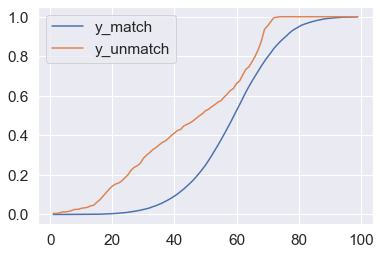

69
0.7968


In [185]:
df_results_eval['u_entr'] = 1 - df_results_eval['u_entr']
max_u_entr=max(df_results_eval['u_entr'])
min_u_entr=min(df_results_eval['u_entr'])
mean_u_entr=np.mean(df_results_eval['u_entr'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['u_entr_Norm']=df_results_eval['u_entr'].apply(lambda x: 
                                                (x-min_u_entr)/(max_u_entr-min_u_entr)*100)

print(f'max_u_entr: {max_u_entr} .. min_u_entr: {min_u_entr} .. mean_u_entr: {mean_u_entr}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['u_entr_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['u_entr_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.95   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break


max_P_jsd: 0.9884624223485472 .. min_P_jsd: 0.6475328773047381 .. mean_P_jsd: 0.872790126759246


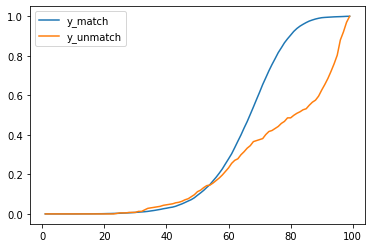

97
0.9995


In [27]:
max_P_jsd=max(df_results_eval['P_jsd'])
min_P_jsd=min(df_results_eval['P_jsd'])
mean_P_jsd=np.mean(df_results_eval['P_jsd'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['P_jsd_Norm']=df_results_eval['P_jsd'].apply(lambda x: 
                                                (x-min_P_jsd)/(max_P_jsd-min_P_jsd)*100)

print(f'max_P_jsd: {max_P_jsd} .. min_P_jsd: {min_P_jsd} .. mean_P_jsd: {mean_P_jsd}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['P_jsd_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['P_jsd_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.95   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break


max_std: 0.1293950378894806 .. min_std: 0.03648602217435837 .. mean_std: 0.08776768746592849


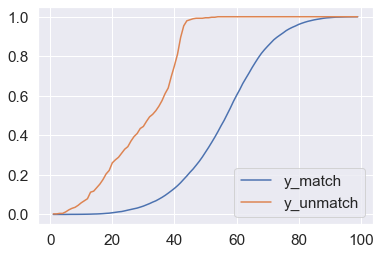

42
0.1777


In [52]:
max_std=max(df_results_eval['std'])
min_std=min(df_results_eval['std'])
mean_std=np.mean(df_results_eval['std'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['std_Norm']=df_results_eval['std'].apply(lambda x: 
                                                (x-min_std)/(max_std-min_std)*100)

print(f'max_std: {max_std} .. min_std: {min_std} .. mean_std: {mean_std}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['std_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['std_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.95   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break


max_var: 0.016743075102567673 .. min_var: 0.0013312296941876411 .. mean_var: 0.007888181481275415


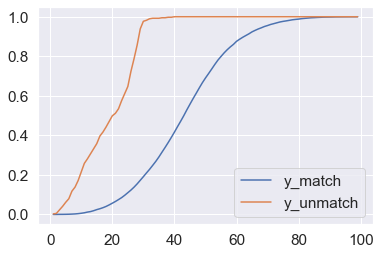

29
0.1909


In [51]:
max_var=max(df_results_eval['var'])
min_var=min(df_results_eval['var'])
mean_var=np.mean(df_results_eval['var'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['var_Norm']=df_results_eval['var'].apply(lambda x: 
                                                (x-min_var)/(max_var-min_var)*100)

print(f'max_var: {max_var} .. min_var: {min_var} .. mean_var: {mean_var}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['var_Norm']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['var_Norm']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.94   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break


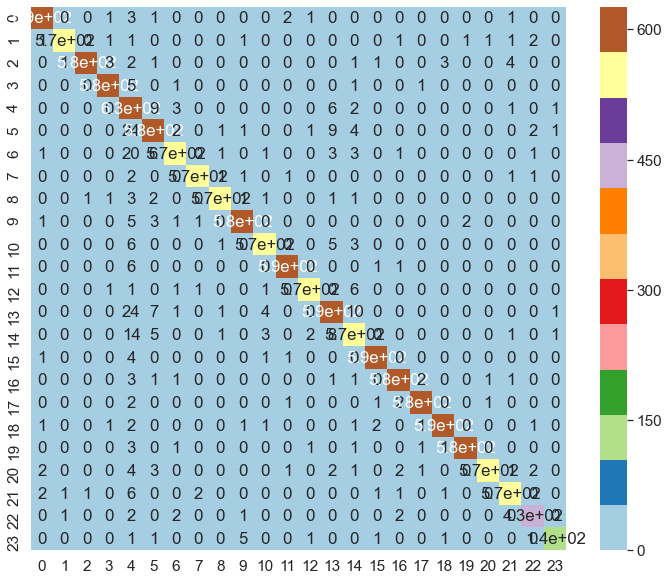

In [36]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
l_label = list(df_final['actual_class'])
l_pred = list(df_final['best_pred'])
performance.plot_confusion_matrix(l_label, l_pred)

In [66]:
l_label_idx = list(df_final['class_idx'])
l_pred_idx = list(df_final['best_index'])
l_predict_proba = list(df_final['Mean'])
roc_auc_score(l_label_idx, l_predict_proba, multi_class='ovr')

0.995148555819998

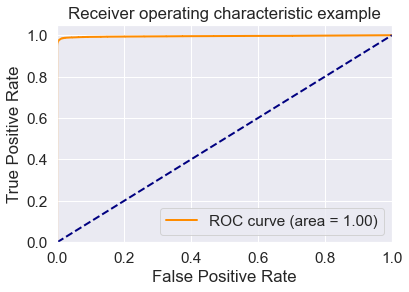

In [67]:
fpr = dict()
tpr = dict()
roc_auc = dict()

arr_label_idx = np.array(l_label_idx).reshape(-1,1)
arr_predict_proba = np.array(l_predict_proba)

#label_encoder = LabelEncoder()
#l_label_int = label_encoder.fit_transform(l_label_int)    
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(arr_label_idx)   # onehot_encoded => array(852,24)=(n_samples, n_classes)

# Compute micro-average ROC curve and ROC area
fpr["ALL"], tpr["ALL"], _ = roc_curve(onehot_encoded.ravel(), arr_predict_proba.ravel())
roc_auc["ALL"] = auc(fpr["ALL"], tpr["ALL"])

plt.figure()
lw = 2
plt.plot(fpr["ALL"], tpr["ALL"], color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["ALL"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fpr_ALL, tpr_ALL, roc_auc_val = fpr['ALL'], tpr['ALL'], roc_auc["ALL"]
# print(f"fpr_ALL: {fpr_ALL} .. ttpr_ALL: {tpr_ALL} .. roc_auc_val: {roc_auc_val}")


In [69]:
len(arr_label_idx)

13721

In [49]:
# print(metrics.confusion_matrix(l_label, l_pred))
print(metrics.classification_report(l_label, l_pred, digits=4))

              precision    recall  f1-score   support

           1     0.9849    0.9849    0.9849       598
          10     0.9947    0.9827    0.9887       578
          11     0.9965    0.9730    0.9846       593
          12     0.9863    0.9863    0.9863       585
          13     0.8140    0.9660    0.8836       648
          14     0.9372    0.9282    0.9327       627
          15     0.9778    0.9392    0.9581       609
          16     0.9931    0.9879    0.9905       579
          17     0.9896    0.9811    0.9853       582
          18     0.9812    0.9779    0.9796       588
          19     0.9794    0.9744    0.9769       585
           2     0.9900    0.9867    0.9883       600
          20     0.9895    0.9810    0.9853       579
          21     0.9439    0.9246    0.9342       637
          22     0.9421    0.9421    0.9421       605
           3     0.9882    0.9882    0.9882       595
           4     0.9831    0.9814    0.9822       592
           5     0.9898    

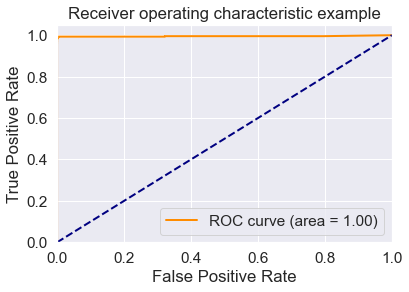

0.9954


In [54]:
arr_label_idx = np.array(l_label_idx).reshape(-1,1)
arr_predict_proba = np.array(l_predict_proba)

# plt_class = for which class you want to plot the ROC CURVE
fpr_micro, tpr_micro, roc_auc_val = \
performance.plot_roc_curve(arr_label_idx, arr_predict_proba, n_classes=24, plt_class=22)

print(round(roc_auc_val,4))

In [71]:
df_results_eval.iloc[0:10]

uncertainty actual_class best_pred best_2nd_pred best_score best_2nd_score  \
0  0.2612      9            9         8             0.4685     0.1224          
1  0.2773      4            4         5             0.4476     0.1241          
2  0.9616      20           20        9             0.2063     0.1984          
3  0.3986      22           22        19            0.4064     0.162           
4  0.4703      7            7         5             0.3958     0.1861          
5  0.2443      15           15        20            0.4907     0.1199          
6  0.3208      10           10        16            0.3998     0.1282          
7  0.344       21           21        22            0.3849     0.1324          
8  0.2251      6            6         3             0.4851     0.1092          
9  0.3195      11           11        3             0.3753     0.1199          

  class_idx best_index best_2nd_index     entr  ...       var Certainty  \
0  8         8          7              2.86742  ...  0.008711  73.8741    
1  3         3          4              2.8462   ...  0.008196  72.2744    
2  19        19         8              3.41327  ...  0.003238  3.82937    
3  21        21         18             2.68415  ...  0.007568  60.1378    
4  6         6          4              2.98457  ...  0.007013  52.9813    
5  14        14         19             2.61402  ...  0.009840  75.5655    
6  9         9          15             2.9872   ...  0.006806  67.934     
7  20        20         21             2.80461  ...  0.006745  65.6015    
8  5         5          2              2.7478   ...  0.009339  77.4892    
9  10        10         2              3.16274  ...  0.005990  68.0522    

  best_score_Norm         BC    BC_Norm Certainty_Norm u_entr_Norm P_jsd_Norm  \
0  65.104169       0.0573444  42.476290  80.486799      40.638411   58.240932   
1  61.216521       0.0555472  40.732884  78.741599      39.495186   75.090052   
2  16.331847       0.0409299  26.553521  4.071776       70.052263   68.385208   
3  53.552830       0.0658368  50.714296  65.501265      30.762853   90.265047   
4  51.581103       0.0736584  58.301574  57.693908      46.951528   52.309285   
5  69.233638       0.0588349  43.922171  82.332093      26.983609   74.147022   
6  52.325153       0.0512544  36.568677  74.006476      47.093044   63.789549   
7  49.553576       0.0509608  36.283883  71.461827      37.253963   90.909203   
8  68.191969       0.0529729  38.235763  84.430699      34.192573   70.652443   
9  47.767857       0.0449985  30.500191  74.135486      56.552192   53.731957   

    std_Norm   var_Norm  
0  61.186001  47.884480  
1  58.168320  44.539674  
2  21.975039  12.371657  
3  54.366046  40.470463  
4  50.865663  36.867507  
5  67.496199  55.208392  
6  49.525659  35.524566  
7  49.122148  35.124115  
8  64.743978  51.959190  
9  44.034512  30.231480  

[10 rows x 30 columns]

In [86]:
pd.set_option('display.max_columns', None)
df_results_eval[df_results_eval['picture']=='MA160814197500042.017-K_9_0_.png']

uncertainty actual_class best_pred best_2nd_pred best_score best_2nd_score  \
0  0.2612      9            9         8             0.4685     0.1224          

  class_idx best_index best_2nd_index     entr    u_entr  \
0  8         8          7              2.86742  0.625396   

                            picture        model     P_jsd    P_info      jsd  \
0  MA160814197500042.017-K_9_0_.png  densenet121  0.846093  0.468841  0.43207   

     sum_H    H_sum  \
0  2.43535  2.86742   

                                                                                                                                                                                                                                                                    Mean  \
0  [0.023036597, 0.05714159, 0.0, 0.059802044, 0.033663917, 0.005911586, 0.015167502, 0.12238173, 0.46853274, 0.04635459, 0.0010059063, 0.018219594, 0.0052866167, 0.048505418, 0.0025044524, 0.0352748, 0.02838259, 0.0, 0.0, 0.022434179, 0.0, 0.0, 0.0063941744, 0.0]   

        std       var Certainty  best_score_Norm         BC   BC_Norm  \
0  0.093333  0.008711  73.8741   65.104169        0.0573444  42.47629   

   Certainty_Norm  u_entr_Norm  P_jsd_Norm   std_Norm  var_Norm  
0  80.486799       40.638411    58.240932   61.186001  47.88448

In [72]:
df_results_eval.columns

Index(['uncertainty', 'actual_class', 'best_pred', 'best_2nd_pred',
       'best_score', 'best_2nd_score', 'class_idx', 'best_index',
       'best_2nd_index', 'entr', 'u_entr', 'picture', 'model', 'P_jsd',
       'P_info', 'jsd', 'sum_H', 'H_sum', 'Mean', 'std', 'var', 'Certainty',
       'best_score_Norm', 'BC', 'BC_Norm', 'Certainty_Norm', 'u_entr_Norm',
       'P_jsd_Norm', 'std_Norm', 'var_Norm'],
      dtype='object')

In [89]:
# df_results_eval
output = tuc1.normalize_array_preprocess(tuc1.df_result_ensemble.loc[0,'outputs_all'])
output

array([[0.        , 0.06256127, 0.        , 0.        , 0.03782219,
        0.        , 0.        , 0.19175704, 0.5253599 , 0.03700781,
        0.        , 0.02965725, 0.        , 0.0527625 , 0.        ,
        0.03092206, 0.00068317, 0.        , 0.        , 0.03146681,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.06873669, 0.        , 0.02702119, 0.00154527,
        0.        , 0.        , 0.16386728, 0.52969056, 0.01956375,
        0.        , 0.01990338, 0.        , 0.03716968, 0.        ,
        0.04176557, 0.06658664, 0.        , 0.        , 0.02415012,
        0.        , 0.        , 0.        , 0.        ],
       [0.16125618, 0.        , 0.        , 0.19564089, 0.        ,
        0.0413811 , 0.10617251, 0.02133163, 0.22383673, 0.13001913,
        0.        , 0.        , 0.        , 0.        , 0.00146825,
        0.02755091, 0.04363563, 0.        , 0.        , 0.04770697,
        0.        , 0.        , 0.        , 0.        ],
       [0.   

In [110]:
entr(output[:,8]).sum()

2.3791814

In [116]:
x=0
# variance of the scores of the best prediction (pred with the highest score)
# indexes are preserved between 2 dataframes
np.var(tuc1.normalize_array_preprocess(tuc1.df_result_ensemble.loc[x,
                                        'outputs_all'])[:,df_results_eval.loc[x,'best_index']])


0.012385434

In [133]:
lst_var = []
for x in df_results_eval.index:
    lst_var.append(np.var(tuc1.normalize_array_preprocess(tuc1.df_result_ensemble.loc[x,
                                        'outputs_all'])[:,df_results_eval.loc[x,'best_index']]))

df_results_eval['var_models'] = lst_var

13721

max_var: 0.07907562702894211 .. min_var: 7.641664524271619e-06 .. mean_var: 0.009605469047751374


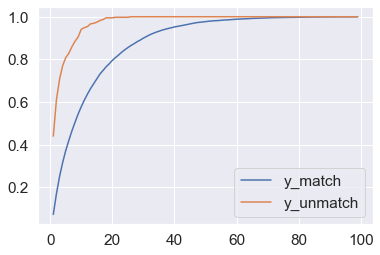

9
0.578


In [136]:
max_var=max(df_results_eval['var_models'])
min_var=min(df_results_eval['var_models'])
mean_var=np.mean(df_results_eval['var_models'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['var_Norm_mod']=df_results_eval['var_models'].apply(lambda x: 
                                                (x-min_var)/(max_var-min_var)*100)

print(f'max_var: {max_var} .. min_var: {min_var} .. mean_var: {mean_var}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['var_Norm_mod']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['var_Norm_mod']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.94   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break

max_var: 2.5744104385375977 .. min_var: 1.4876863956451416 .. mean_var: 2.3843483377863546


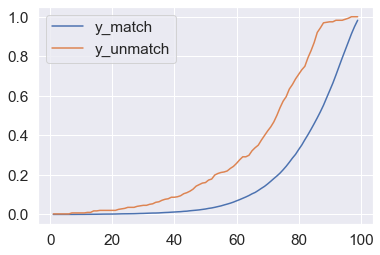

86
0.5194


In [137]:
lst_entr = []
for x in df_results_eval.index:
    etnr_temp = entr(tuc1.normalize_array_preprocess(tuc1.df_result_ensemble.loc[x,
                                        'outputs_all'])[:,df_results_eval.loc[x,'best_index']])
    lst_entr.append(etnr_temp.sum())

df_results_eval['entr_models'] = lst_entr

max_var=max(df_results_eval['entr_models'])
min_var=min(df_results_eval['entr_models'])
mean_var=np.mean(df_results_eval['entr_models'])

#df_results_eval['Certainty_Norm']=df_results_eval['Certainty'].apply(lambda x: x/(max_certainty-min_certainty)*100)
df_results_eval['entr_models_mod']=df_results_eval['entr_models'].apply(lambda x: 
                                                (x-min_var)/(max_var-min_var)*100)

print(f'max_var: {max_var} .. min_var: {min_var} .. mean_var: {mean_var}')

x=[]; y_match=[]; y_unmatch=[]
for i in range(1, 100, 1):
    x.append(i)
    len_match = len(df_results_eval[df_results_eval['actual_class'] == df_results_eval['best_pred']])
    len_unmatch = len(df_results_eval[df_results_eval['actual_class'] != df_results_eval['best_pred']])
    y_match.append(len(df_results_eval[(df_results_eval['actual_class'] == df_results_eval['best_pred']) &
                                 (df_results_eval['entr_models_mod']<i)])/len_match)
    y_unmatch.append(len(df_results_eval[(df_results_eval['actual_class'] != df_results_eval['best_pred']) &
                                 (df_results_eval['entr_models_mod']<i)])/len_unmatch)

plt.plot(x, y_match)
plt.plot(x, y_unmatch)
plt.legend(['y_match', 'y_unmatch'])

plt.show()

"""
* if you want to detect 95% of the incorrect predictions, the threshold you should use is 37 for Certainty_Norm
* with this threshold, you will indetify 9.94% of correctly predicted classes as incorrect/uncertain
"""

t = 0.94   # threshold
for i, y in enumerate(y_unmatch):
    if y >= t:
        print(i)
        print(round(y_match[i], 4))
        break

In [122]:
for i in range(len(df_results_eval)):
    if i %1000 == 0:
        pic1 = df_results_eval.loc[i,'picture']
        pic2 = tuc1.df_result_ensemble.loc[i,'picture']
        print(f'df_results_eval: {pic1} ... df_result_ensemble: {pic2}')
    if df_results_eval.loc[i,'picture'] != tuc1.df_result_ensemble.loc[i,'picture']:
        print('mismatch')

df_results_eval: MA160814197500042.017-K_9_0_.png ... df_result_ensemble: MA160814197500042.017-K_9_0_.png
df_results_eval: MA160865191500042.016-K_2_1_.png ... df_result_ensemble: MA160865191500042.016-K_2_1_.png
df_results_eval: MA160873676300016.035-K_21_1_.png ... df_result_ensemble: MA160873676300016.035-K_21_1_.png
df_results_eval: MA160865191500021.014-K_6_1_.png ... df_result_ensemble: MA160865191500021.014-K_6_1_.png
df_results_eval: MA160865191500002.033-K_3_0_.png ... df_result_ensemble: MA160865191500002.033-K_3_0_.png
df_results_eval: MA160814197500059.038-K_5_0_.png ... df_result_ensemble: MA160814197500059.038-K_5_0_.png
df_results_eval: MA1867833.026-K_16_1_.png ... df_result_ensemble: MA1867833.026-K_16_1_.png
df_results_eval: MA160814197500041.053-K_8_0_.png ... df_result_ensemble: MA160814197500041.053-K_8_0_.png
df_results_eval: MA160865191500027.008-K_19_0_.png ... df_result_ensemble: MA160865191500027.008-K_19_0_.png
df_results_eval: MA160865191500021.018-K_2_0_.p

In [111]:
np.var(output[:,8])

0.012385434

In [114]:
output[:,8]

array([0.5253599 , 0.52969056, 0.22383673, 0.5248396 , 0.3923394 ,
       0.54992497, 0.5337379 ], dtype=float32)

In [109]:
P_test = np.zeros(24)/24
P_test[8]=1
P_test
e1=entr(P_test).sum(axis=0)/np.log(2)
e1

0.0

2.058291863463907

In [100]:
tuc1.H_max

4.584962500721156

In [88]:
from scipy.special import entr
entr_per_model=entr(output).sum(axis=1)/np.log(2)
entr_per_model2=entr(output).sum(axis=0)/np.log(2)
print(entr_per_model)
print(np.mean(entr_per_model))
print(entr_per_model2)
print(np.mean(entr_per_model2))

[2.2433643 2.3153195 2.966279  2.2615585 2.85784   2.2082052 2.1948552]
2.4353461
[0.42451876 1.4463333  0.         1.2395692  1.0397316  0.19014138
 0.34352306 2.4260385  3.4324331  1.2729747  0.05711209 0.5500127
 0.17600518 1.3749511  0.10955567 1.1091077  0.9037415  0.
 0.         0.75107646 0.         0.         0.20059611 0.        ]
0.71030927


In [75]:
tuc1.df_result_ensemble.iloc[0:10,:]

picture        model label  \
0  MA160814197500042.017-K_9_0_.png   densenet121  9      
1  MA160814197500041.070-K_4_0_.png   densenet121  4      
2  MA160873676300027.057-K_20_1_.png  densenet121  20     
3  MA1867826.007-K_22_0_.png          densenet121  22     
4  MA1867835.121-K_7_1_.png           densenet121  7      
5  MA160814197500062.005-K_15_1_.png  densenet121  15     
6  MA160873676300016.059-K_10_0_.png  densenet121  10     
7  MA160865191500037.027-K_21_0_.png  densenet121  21     
8  MA1867826.007-K_6_1_.png           densenet121  6      
9  MA160814197500025.093-K_11_1_.png  densenet121  11     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      outputs_all  
0  [[-3.8279471, 2.5221746, -4.21457, -1.9565997, 1.5248116, -2.8804567, -1.378363, 7.7307367, 21.180027, 1.4919798, -0.41747808, 1.1956401, -1.4827523, 2.1271343, -0.0059951693, 1.246631, 0.027542323, -4.6660204, -8.515214, 1.268593, -2.6665342, -0.162903, -3.6284597, -3.6976867], [-5.8150735, 2.823388, -2.6719637, 1.1099068, 0.06347279, -0.32030666, -3.7900286, 6.7309165, 21.75726, 0.803589, -0.15128261, 0.8175396, -1.3528739, 1.5267599, -1.6538264, 1.7155383, 2.7350738, -5.4613714, -7.445368, 0.99197626, -1.4617952, -1.853207, -3.2246735, -5.3415337], [2.538806, -0.13936928, -0.40731135, 3.0801566, -0.34518638, 0.6515012, 1.6715726, 0.33584365, 3.5240698, 2.047012, -0.38867372, -0.5910539, -1.1803843, -0.3257112, 0.023116067, 0.43375966, 0.6869962, -1.675176, -2.363657, 0.75109524, -3.3656933, -2.7419095, -0.2301691, -2.1919694], [-3.3149948, 2.361112, -4.51679, -0.76669115, 1.3738939, -1.328419, -1.8196473, 6.063766, 19.944765, 2.5290682, 0.1647468, -0.19900292, -0.7017835, 1.7806379, -2.3596513, 2.2978022, 1.4858478, -4.5568995, -8.112211, -0.3187028, -1.7127, -0.8629713, -2.2265744, -5.425847], [-1.0870342, 0.081341535, -0.16538642, 2.1244617, 0.79840815, -0.2768662, -1.4476258, 0.77539355, 5.674616, -0.18325953, -1.2123419, 1.1278166, 0.5352423, 1.4671898, 0.23232655, 0.31505144, -0.057077046, -0.90067184, -2.437203, 0.6843139, -2.2127473, -2.483

In [143]:
x=0
pic_outputs_all_arr = tuc1.df_result_ensemble.loc[x,'outputs_all']

lst_y = []

for i in pic_outputs_all_arr:
    lst_y.append(i)

lst_y = np.array(lst_y)    # shape = (5, 24)
lst_y = lst_y.clip(0)


In [144]:
lst_y

array([[ 0.        ,  2.5221746 ,  0.        ,  0.        ,  1.5248116 ,
         0.        ,  0.        ,  7.7307367 , 21.180027  ,  1.4919798 ,
         0.        ,  1.1956401 ,  0.        ,  2.1271343 ,  0.        ,
         1.246631  ,  0.02754232,  0.        ,  0.        ,  1.268593  ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.823388  ,  0.        ,  1.1099068 ,  0.06347279,
         0.        ,  0.        ,  6.7309165 , 21.75726   ,  0.803589  ,
         0.        ,  0.8175396 ,  0.        ,  1.5267599 ,  0.        ,
         1.7155383 ,  2.7350738 ,  0.        ,  0.        ,  0.99197626,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.538806  ,  0.        ,  0.        ,  3.0801566 ,  0.        ,
         0.6515012 ,  1.6715726 ,  0.33584365,  3.5240698 ,  2.047012  ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02311607,
         0.43375966,  0.6869962 ,  0.        ,  0.        ,  0.75109524,
  

In [151]:
from scipy.special import softmax
x=0
pic_outputs_all_arr = tuc1.df_result_ensemble.loc[x,'outputs_all']

lst_y = []

for i in pic_outputs_all_arr:
    lst_y.append(i)

lst_y = np.array(lst_y)    # shape = (5, 24)
#lst_y = softmax(lst_y)
lst_y

array([[-3.8279471e+00,  2.5221746e+00, -4.2145700e+00, -1.9565997e+00,
         1.5248116e+00, -2.8804567e+00, -1.3783630e+00,  7.7307367e+00,
         2.1180027e+01,  1.4919798e+00, -4.1747808e-01,  1.1956401e+00,
        -1.4827523e+00,  2.1271343e+00, -5.9951693e-03,  1.2466310e+00,
         2.7542323e-02, -4.6660204e+00, -8.5152140e+00,  1.2685930e+00,
        -2.6665342e+00, -1.6290300e-01, -3.6284597e+00, -3.6976867e+00],
       [-5.8150735e+00,  2.8233881e+00, -2.6719637e+00,  1.1099068e+00,
         6.3472793e-02, -3.2030666e-01, -3.7900286e+00,  6.7309165e+00,
         2.1757259e+01,  8.0358899e-01, -1.5128261e-01,  8.1753957e-01,
        -1.3528739e+00,  1.5267599e+00, -1.6538264e+00,  1.7155383e+00,
         2.7350738e+00, -5.4613714e+00, -7.4453678e+00,  9.9197626e-01,
        -1.4617952e+00, -1.8532070e+00, -3.2246735e+00, -5.3415337e+00],
       [ 2.5388060e+00, -1.3936928e-01, -4.0731135e-01,  3.0801566e+00,
        -3.4518638e-01,  6.5150118e-01,  1.6715726e+00,  3.358

In [183]:
lst_y[:,8]*100

array([ 99.99981, 100.     ,  34.90098, 100.     ,  89.39185, 100.     ,
        99.99981], dtype=float32)

In [158]:
for i, l_y in enumerate(lst_y):
    lst_y[i] = softmax(l_y)